In [1]:
import random
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

%matplotlib inline

### Normal Distribution: Coin Flips

In [ ]:
def heads_tails(number_of_flips):
    tails_count = 0
    heads_count = 0
    for i in range(number_of_flips):
        rand = random.randint(0, 1)
        if rand == 1:
            tails_count += 1
        else:
            heads_count += 1
            
    print('Total Flips: {0:10}, Tails: {1:10}, Heads: {2:10}'.format(number_of_flips, tails_count, heads_count))
    return (heads_count/number_of_flips)*100

In [ ]:
flips = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 10000, 100000]
[heads_tails(a) for a in flips]

### Normal Distribution: Throw Dice

In [ ]:
def dice_throw(number_of_throws):
    face_of_the_dice = [0, 0, 0, 0, 0, 0]
    for i in range(number_of_throws):
        rand = random.randint(1, 6)
        face_of_the_dice[rand-1] += 1
            
    print('Total Throws: {0:8}, 1s: {1:8}, 2s: {2:8}, 3s: {3:8}, 4s: {4:8}, 5s: {5:8}, 6s: {6:8}'.format(number_of_throws, face_of_the_dice[0], face_of_the_dice[1], face_of_the_dice[2], face_of_the_dice[3], face_of_the_dice[4], face_of_the_dice[5]))
    return '1s: {0:8}, 2s: {1:8}, 3s: {2:8}, 4s: {3:8}, 5s: {4:8}, 6s: {5:8}'.format(face_of_the_dice[0]/number_of_throws, face_of_the_dice[1]/number_of_throws, face_of_the_dice[2]/number_of_throws, face_of_the_dice[3]/number_of_throws, face_of_the_dice[4]/number_of_throws, face_of_the_dice[5]/number_of_throws)

In [ ]:
flips = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 10000, 100000]
[dice_throw(a) for a in flips]

### n Coin Flips

In [5]:
NUM_COINS = 5
PROBABILITY = 0.25

In [ ]:
def coin_flip(no_of_coins, probability):
    flips = [1 if(random.random() < probability) else 0 for flip in range(no_of_coins)]
    return flips

In [ ]:
def n_coin_flip(n_coin):
    return [coin_flip(n_coin, PROBABILITY) for i in range(2**n_coin)]

In [ ]:
flip_series = n_coin_flip(NUM_COINS)
df_flips = pd.DataFrame(flip_series, columns=['C'+str(i+1) for i in range(NUM_COINS)])

In [ ]:
df_flips

In [ ]:
df_flips["Head Count"] = df_flips.sum(axis=1)

In [ ]:
df_flips

In [ ]:
data = pd.DataFrame(df_flips["Head Count"].value_counts())
data

In [ ]:
data["Head Count"].sort_index().plot(kind="bar")

In [ ]:
data["Head Count"].sort_index()

### n Coin n Flips



In [9]:
NUM_FLIPS = 100

In [10]:
def flip_series():
    flip_series = n_coin_flip(NUM_COINS)
    df_flips = pd.DataFrame(flip_series, columns=['C'+str(i+1) for i in range(NUM_COINS)])
    return pd.DataFrame(df_flips.sum(axis=1).value_counts().sort_index())

In [ ]:
series = pd.DataFrame()
for i in range(NUM_FLIPS):
    this_series = flip_series()
    series["I"+str(i+1)] = this_series[0]

In [ ]:
series.fillna(value=0)

In [ ]:
series.columns
mean_of_series = pd.DataFrame(series.mean(axis=1))
mean_of_series

In [ ]:
mean_of_series.plot(kind="bar")

In [ ]:
for i in range(len(series.columns)):
    series[series.columns[i]].plot(kind="bar")
    plt.show()

### PMF of Binomial Distribution



#### (n  x)(p^x)(1-p)^(n-p)
#### (n  x) = n!/x!(n-x)!

In [64]:
x = np.arange(100) # This creates a array of 1 to 100 -> ie how many flips HEAD can occur
n = 100 # NUM_FLIPS
p = 0.25 # FAIR COIN

In [65]:
from scipy.stats import binom
pmf_bi = binom.pmf(x, n, p) # This scipy method solves the above formula
len(pmf_bi)

100

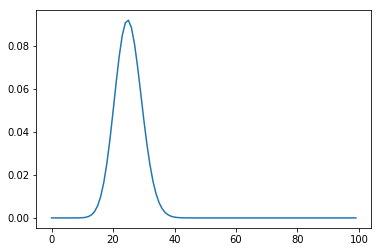

In [66]:
plt.plot(pmf_bi)

In [61]:
sum(pmf_bi) # Area under the curve is 1

0.9999999999999712

In [70]:
np.std(pmf_bi)

0.02347771748369754

In [63]:
print("Sum: {0}, Mean: {1}, Median: {2}, Standard Deviation: {3}".format(pmf_bi.sum(), np.mean(pmf_bi), np.median(pmf_bi), np.std(pmf_bi)))

Sum: 0.999999999999971, Mean: 0.00999999999999971, Median: 1.9131397064512497e-07, Standard Deviation: 0.021528696897223934
